# 1. Importar bibliotecas



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sms

In [4]:
df = pd.read_csv("./estudos/valorant-stats.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               17 non-null     object 
 1   Weapon Type        17 non-null     object 
 2   Price              17 non-null     int64  
 3   Fire Rate          17 non-null     float64
 4   Wall Penetration   17 non-null     object 
 5   Magazine Capacity  17 non-null     int64  
 6   HDMG_0             17 non-null     int64  
 7   BDMG_0             17 non-null     int64  
 8   LDMG_0             17 non-null     int64  
 9   HDMG_1             17 non-null     int64  
 10  BDMG_1             17 non-null     int64  
 11  LDMG_1             17 non-null     int64  
 12  HDMG_2             17 non-null     int64  
 13  BDMG_2             17 non-null     int64  
 14  LDMG_2             17 non-null     int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 2.1+ KB


In [6]:
df_valorant = df.dropna().drop_duplicates()

In [7]:
df_valorant.describe()

,Price,Fire Rate,Magazine Capacity,HDMG_0,BDMG_0,LDMG_0,HDMG_1,BDMG_1,LDMG_1,HDMG_2,BDMG_2,LDMG_2
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,1629.411765,7.463529,21.235294,114.000000,43.588235,36.411765,107.764706,41.470588,34.588235,101.705882,39.235294,32.705882
std,1232.763514,4.779767,23.823647,63.295932,34.483798,29.010901,67.098369,35.709098,30.099956,69.682104,36.705806,30.880343
min,0.000000,0.750000,2.000000,34.000000,12.000000,10.000000,24.000000,8.000000,6.000000,9.000000,3.000000,2.000000
25%,800.000000,3.500000,6.000000,72.000000,26.000000,22.000000,63.000000,22.000000,18.000000,63.000000,22.000000,18.000000
50%,1500.000000,6.750000,13.000000,95.000000,33.000000,26.000000,88.000000,30.000000,25.000000,77.000000,28.000000,23.000000
75%,2500.000000,10.000000,25.000000,156.000000,39.000000,33.000000,156.000000,39.000000,33.000000,145.000000,39.000000,33.000000
max,4500.000000,18.000000,100.000000,255.000000,150.000000,127.000000,255.000000,150.000000,127.000000,255.000000,150.000000,127.000000


In [8]:
df_weapon = df_valorant['Weapon Type'].value_counts()
df_weapon


Sidearm    5
Rifle      4
SMG        2
Sniper     2
Shotgun    2
Heavy      2
Name: Weapon Type, dtype: int64

In [9]:
quantidade = []
armas = []

armas = ["armas","quantidade"]

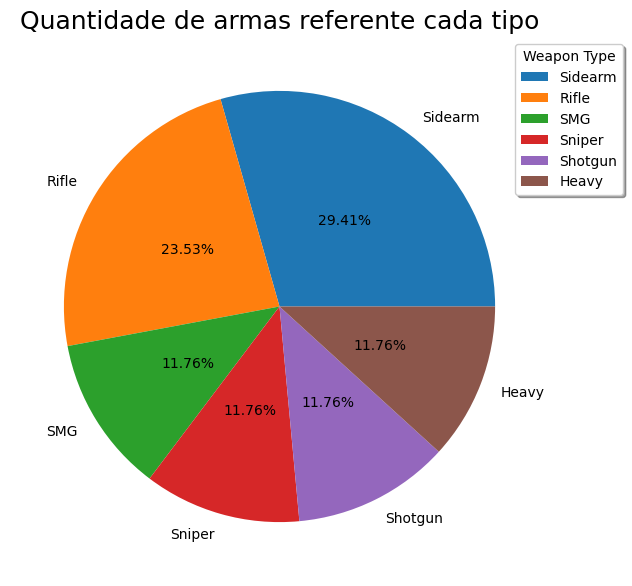

In [10]:
plt.figure(figsize=(15,7))
plt.pie(df_weapon, labels=df_weapon.index,pctdistance=0.5, autopct='%1.2f%%', shadow=False)
plt.legend(loc='upper right', title='Weapon Type', shadow=True, bbox_to_anchor=(1.15, 1))

plt.title("Quantidade de armas referente cada tipo", loc= "center",fontsize= 18)
plt.show()

In [11]:
weapon_price = df[["Name", "Price"]].sort_values(by = "Price", ascending = False)
weapon_price

,Name,Price
12,Operator,4500
16,Odin,3200
9,Phantom,2900
10,Vandal,2900
8,Guardian,2500
7,Bulldog,2100
6,Spectre,1600
15,Ares,1600
14,Judge,1500
11,Marshall,1100


<Figure size 2000x1500 with 0 Axes>

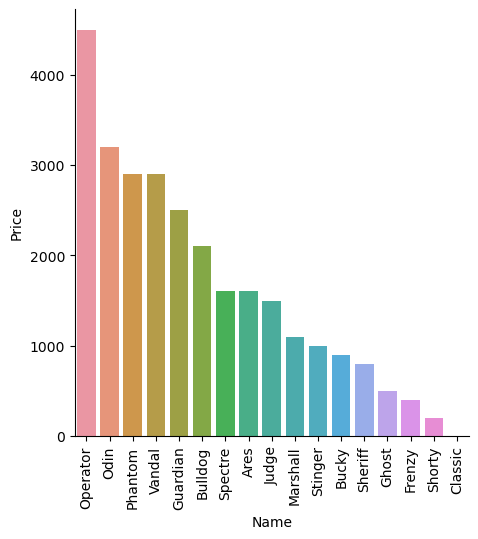

In [12]:
plt.figure(figsize=(20,15))

sms.catplot(kind='bar', data=weapon_price, x="Name", y="Price")
plt.xticks(rotation = 90)


plt.show()

In [13]:
type_price = df.groupby("Weapon Type") [["Weapon Type", "Price"]].agg(sum).sort_values(by = "Price",
ascending=False).reset_index()

type_price

C:\Users\William\AppData\Local\Temp\ipykernel_11824\1560372275.py:1: FutureWarning: The operation <built-in function sum> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  type_price = df.groupby("Weapon Type") [["Weapon Type", "Price"]].agg(sum).sort_values(by = "Price",


,Weapon Type,Price
0,Rifle,10400
1,Sniper,5600
2,Heavy,4800
3,SMG,2600
4,Shotgun,2400
5,Sidearm,1900


<Figure size 1500x700 with 0 Axes>

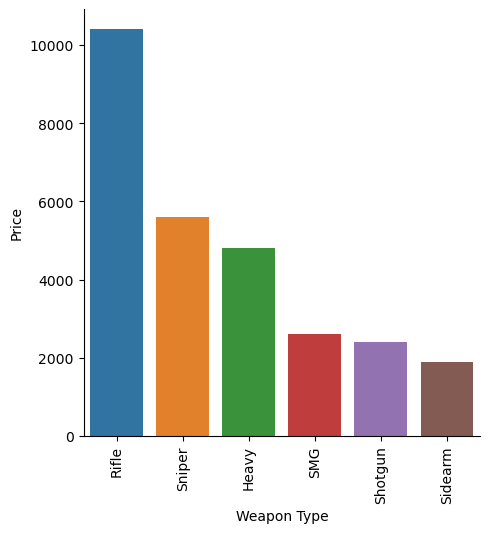

In [14]:
plt.figure(figsize=(15,7))

sms.catplot(data = type_price, x = "Weapon Type", y = "Price", kind="bar")
plt.xticks(rotation = 90)

plt.show()

In [15]:
fire_rate_type = df_valorant.groupby("Weapon Type")[["Weapon Type","Fire Rate"]].agg("mean").sort_values(by="Fire Rate",
ascending=False).reset_index()
fire_rate_type

C:\Users\William\AppData\Local\Temp\ipykernel_11824\3177914221.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fire_rate_type = df_valorant.groupby("Weapon Type")[["Weapon Type","Fire Rate"]].agg("mean").sort_values(by="Fire Rate",


,Weapon Type,Fire Rate
0,SMG,15.665
1,Heavy,11.000
2,Rifle,8.975
3,Sidearm,6.160
4,Shotgun,2.300
5,Sniper,1.125


<Figure size 1500x700 with 0 Axes>

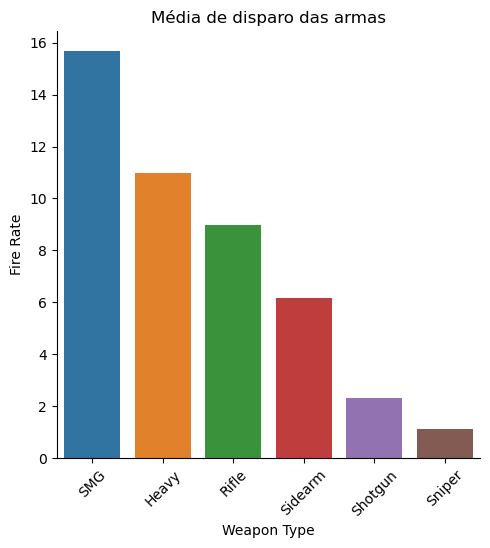

In [16]:
plt.figure(figsize=(15,7))

sms.catplot(kind="bar", data=fire_rate_type, x = "Weapon Type", y = "Fire Rate")
plt.xticks(rotation = 45)
plt.title("Média de disparo das armas")
plt.show()